In [1]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle

In [5]:
#import dataset 
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#view top few rows
df.head().T

,0,1,2,3,4
country,IND,IND,IND,IND,IND
country_long,India,India,India,India,India
name,ACME Solar Tower,ADITYA CEMENT WORKS,AES Saurashtra Windfarms,AGARTALA GT,AKALTARA TPP
gppd_idnr,WRI1020239,WRI1019881,WRI1026669,IND0000001,IND0000002
capacity_mw,2.5,98.0,39.2,135.0,1800.0
latitude,28.1839,24.7663,21.9038,23.8712,21.9603
longitude,73.2407,74.609,69.3732,91.3602,82.4091
primary_fuel,Solar,Coal,Wind,Gas,Coal
other_fuel1,NaN,NaN,NaN,NaN,Oil
other_fuel2,NaN,NaN,NaN,NaN,NaN


In [7]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
#dropping the columns that are either all null or has just 1 null value
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data

In [9]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

In [10]:
# dropping columns which have unique value or which have only one value with null values, or only a single value
# url, latitude, longitude, owner, source won't be of any use because it doesn't contain anything meaningful
df.drop(columns=['country','country_long','name','gppd_idnr','year_of_capacity_data','generation_data_source','url','latitude','longitude','owner','source'],inplace=True)
df        

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.0,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN


In [11]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0,16.725000,59.200000,385.250000,4760.0
commissioning_year,527.0,1997.091082,17.082868,1927.0,1988.000000,2001.000000,2012.000000,2018.0
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0,223.557672,801.123775,3035.306250,28127.0
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0,176.381063,711.181225,3084.121250,30539.0
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0,188.285252,737.205450,3282.861313,30015.0
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0,177.874930,817.977250,3275.690475,35116.0
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0,193.378250,751.644375,3143.535900,35136.0


#### Handling null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          198 non-null    object 
 3   commissioning_year   527 non-null    float64
 4   geolocation_source   888 non-null    object 
 5   generation_gwh_2014  398 non-null    float64
 6   generation_gwh_2015  422 non-null    float64
 7   generation_gwh_2016  434 non-null    float64
 8   generation_gwh_2017  440 non-null    float64
 9   generation_gwh_2018  448 non-null    float64
dtypes: float64(7), object(3)
memory usage: 71.0+ KB


<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

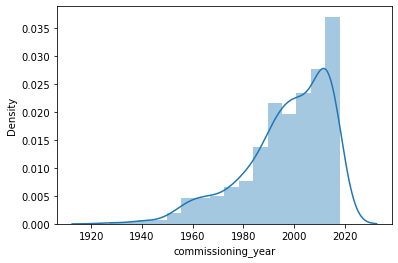

In [13]:
sns.distplot(df['commissioning_year'])

In [14]:
df['commissioning_year'].mean()

1997.0910815939278

In [15]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mean())
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.000000,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,1997.091082,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,1997.091082,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,1997.091082,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,Wind,NaN,1997.091082,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,Coal,NaN,1997.091082,WRI,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

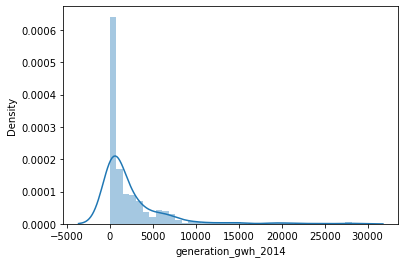

In [16]:
sns.distplot(df['generation_gwh_2014'])

In [17]:
df['generation_gwh_2014'].describe()

count      398.000000
mean      2431.823590
std       4026.440035
min          0.000000
25%        223.557672
50%        801.123775
75%       3035.306250
max      28127.000000
Name: generation_gwh_2014, dtype: float64

In [18]:
df['generation_gwh_2014'].median()

801.123775

In [19]:
#It is right skewed therefore fillling it with median
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.000000,National Renewable Energy Laboratory,801.123775,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,1997.091082,WRI,801.123775,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,1997.091082,WRI,801.123775,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,1997.091082,Industry About,801.123775,NaN,NaN,NaN,NaN
904,25.5,Wind,NaN,1997.091082,WRI,801.123775,NaN,NaN,NaN,NaN
905,80.0,Coal,NaN,1997.091082,WRI,801.123775,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

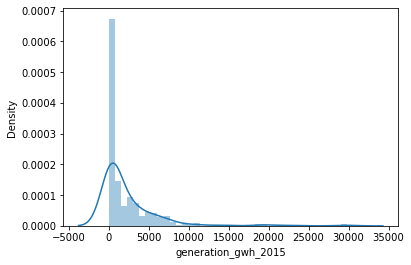

In [20]:
sns.distplot(df['generation_gwh_2015'])

In [21]:
df['generation_gwh_2015'].median()

711.181225

In [22]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,NaN,NaN,NaN
1,98.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,NaN,NaN,NaN
2,39.2,Wind,NaN,1997.091082,WRI,801.123775,711.181225,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,1997.091082,Industry About,801.123775,711.181225,NaN,NaN,NaN
904,25.5,Wind,NaN,1997.091082,WRI,801.123775,711.181225,NaN,NaN,NaN
905,80.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,NaN,NaN,NaN


<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

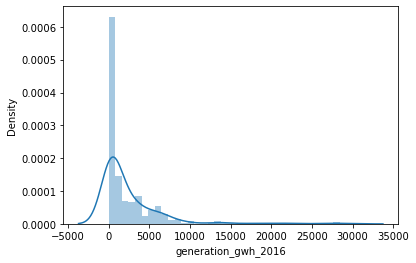

In [23]:
sns.distplot(df['generation_gwh_2016'])

In [24]:
df['generation_gwh_2016'].median()

737.20545

In [25]:
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,NaN,NaN
1,98.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,NaN,NaN
2,39.2,Wind,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,NaN,NaN
3,135.0,Gas,NaN,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,1997.091082,Industry About,801.123775,711.181225,737.205450,NaN,NaN
904,25.5,Wind,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,NaN,NaN
905,80.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,NaN,NaN


<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

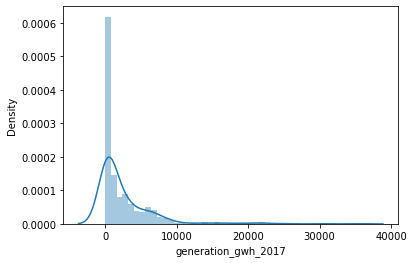

In [26]:
sns.distplot(df['generation_gwh_2017'])

In [27]:
df['generation_gwh_2017'].median()

817.9772499999999

In [28]:
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,NaN
1,98.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,NaN
2,39.2,Wind,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,NaN
3,135.0,Gas,NaN,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,1997.091082,Industry About,801.123775,711.181225,737.205450,817.977250,NaN
904,25.5,Wind,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,NaN
905,80.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,NaN


<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

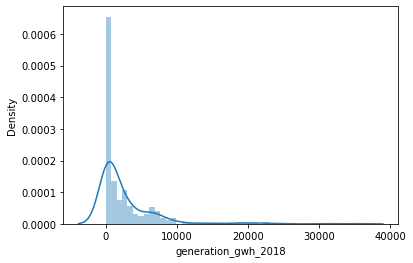

In [29]:
sns.distplot(df['generation_gwh_2018'])

In [30]:
df['generation_gwh_2018'].median()

751.6443750000001

In [31]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,NaN,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,Wind,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,Gas,NaN,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,NaN,1997.091082,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,Wind,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,Coal,NaN,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [32]:
df['other_fuel1'].value_counts().index[0]

'Oil'

In [33]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].value_counts().index[0])
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,Oil,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,Gas,Oil,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,Oil,1997.091082,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [34]:
df['geolocation_source'].value_counts().index[0]

'WRI'

In [35]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].value_counts().index[0])
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,Oil,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,Gas,Oil,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,Oil,1997.091082,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   other_fuel1          907 non-null    object 
 3   commissioning_year   907 non-null    float64
 4   geolocation_source   907 non-null    object 
 5   generation_gwh_2014  907 non-null    float64
 6   generation_gwh_2015  907 non-null    float64
 7   generation_gwh_2016  907 non-null    float64
 8   generation_gwh_2017  907 non-null    float64
 9   generation_gwh_2018  907 non-null    float64
dtypes: float64(7), object(3)
memory usage: 71.0+ KB


#### Univariate Analysis

In [37]:
#spliting the columns into two categories for further analysis
numerical_col=['capacity_mw', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
categorical_col=['primary_fuel', 'other_fuel1', 'geolocation_source']

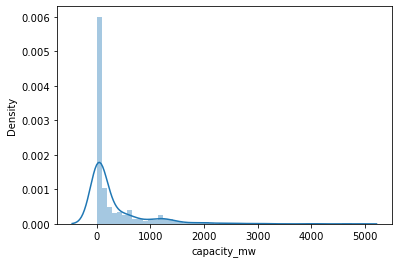

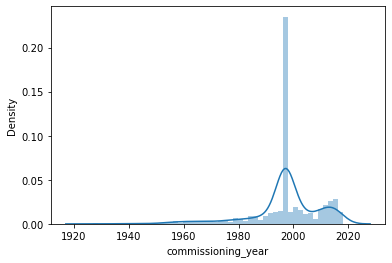

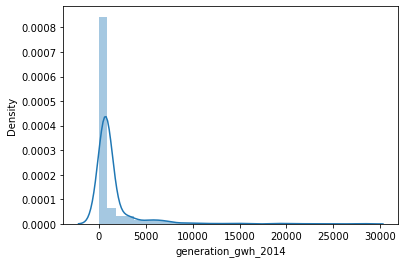

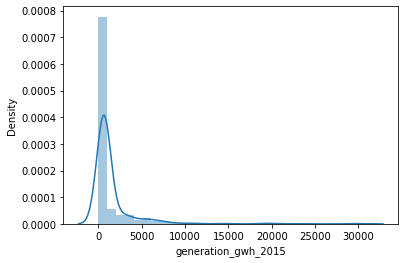

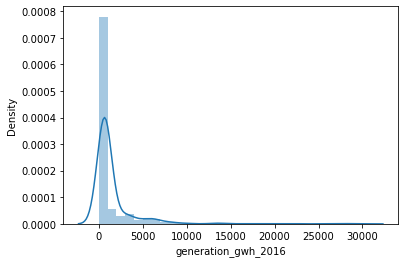

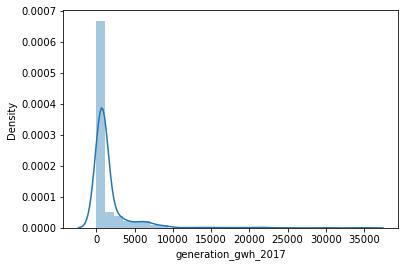

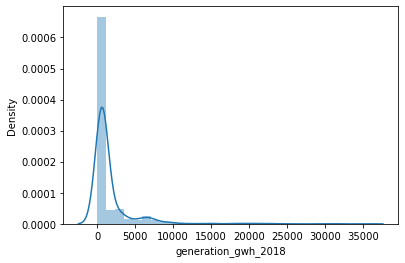

In [38]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

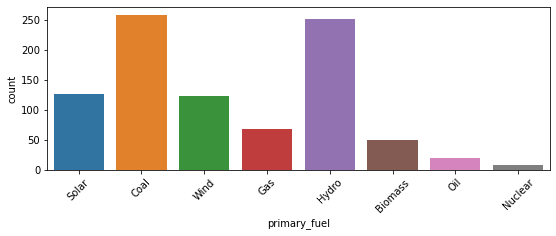

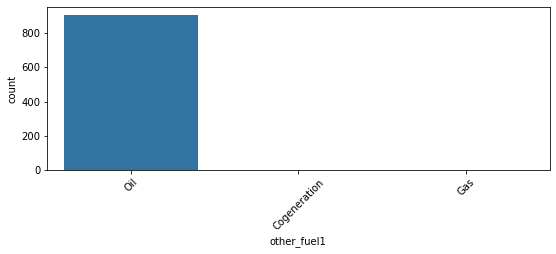

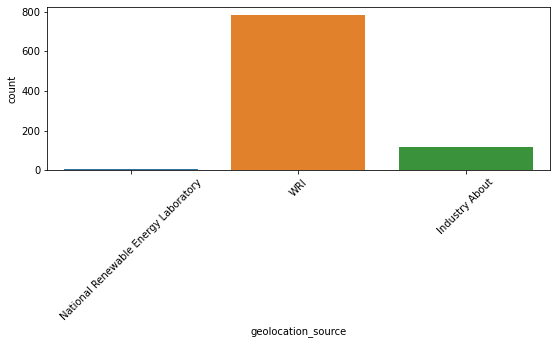

In [39]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(9,3))
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis(Target variable-primary_fuel)

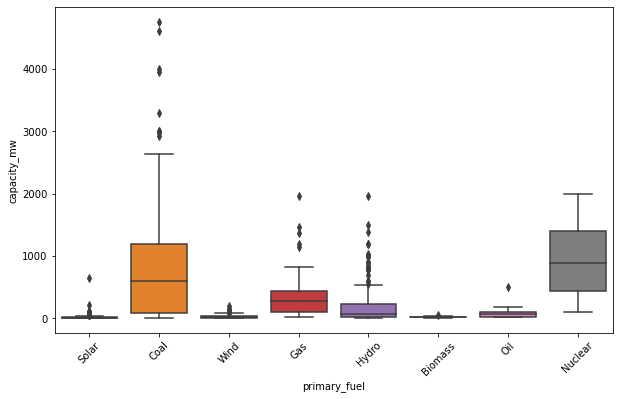

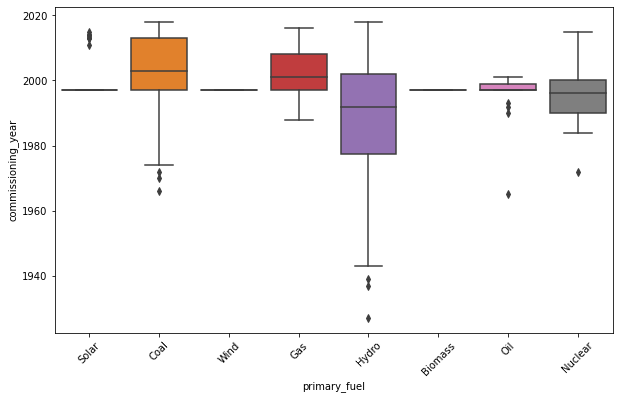

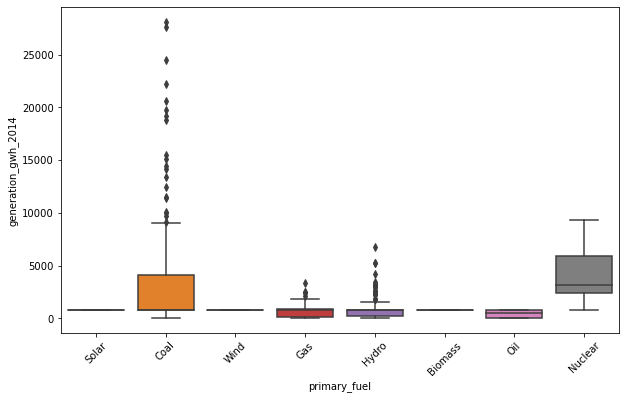

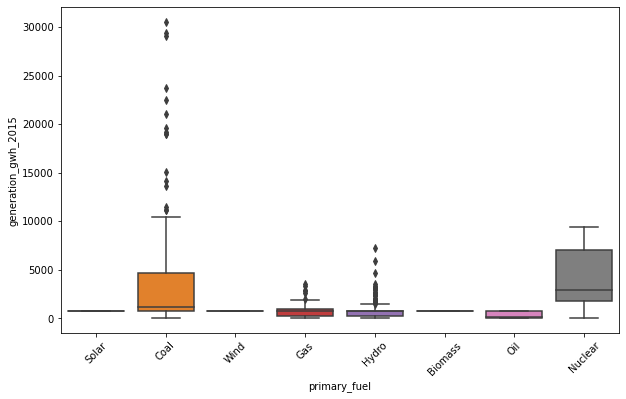

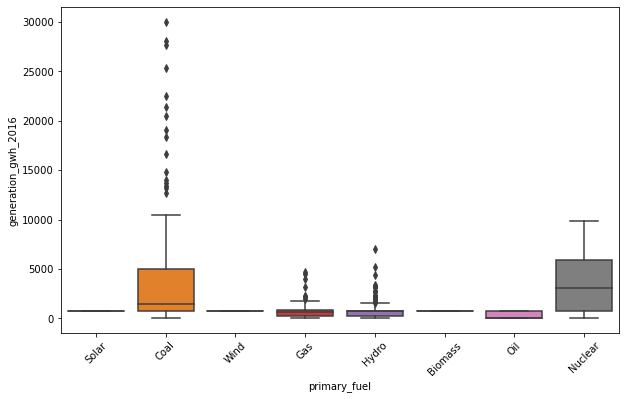

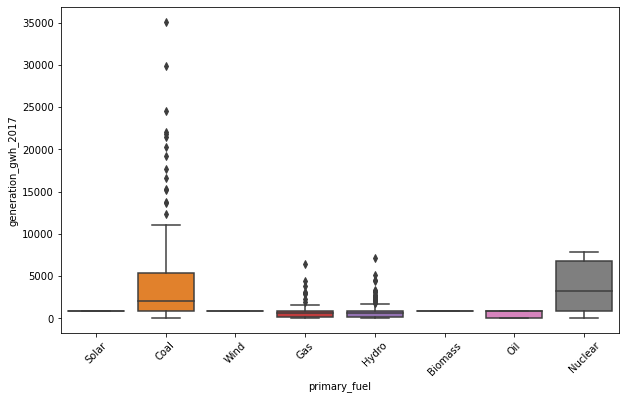

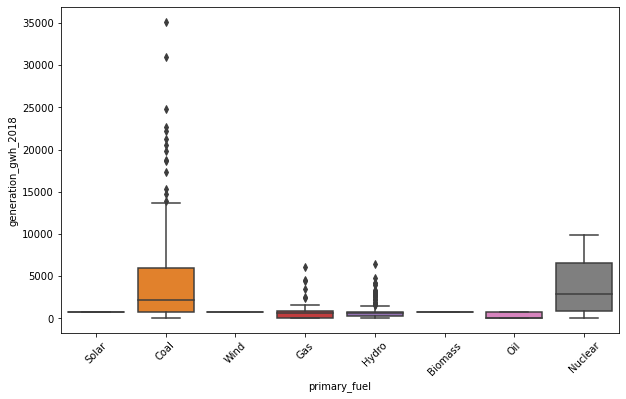

In [40]:
#For all numerical columns compare the value ranges for primary_fuel
for i in numerical_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df['primary_fuel'],y=df[i])
    plt.xticks(rotation=45)
    plt.show()

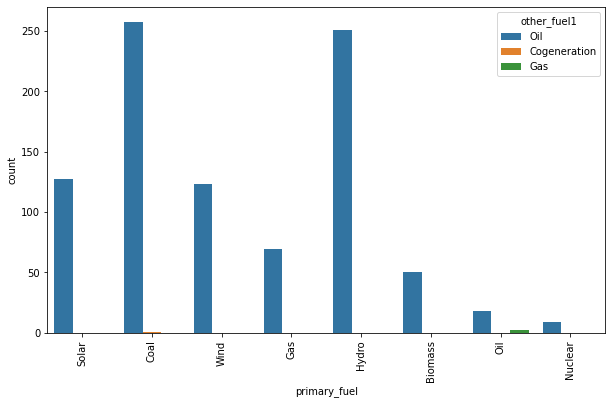

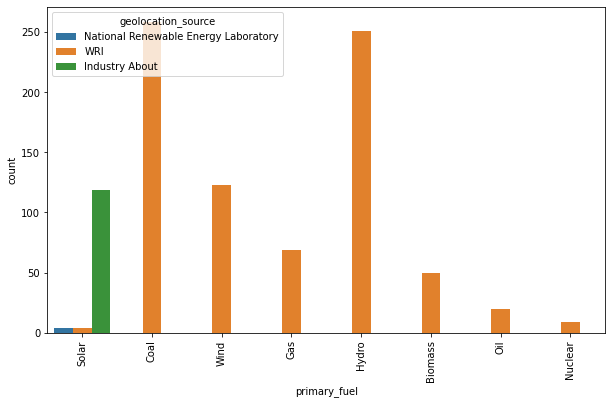

In [41]:
#comparing categorical columns
for i in categorical_col[1:]:
    plt.figure(figsize=(10,6))
    sns.countplot(hue=df[i],x=df['primary_fuel'])
    plt.xticks(rotation=90)
    plt.show()

#### Bivariate Analysis(Target variable-capacity_mw)

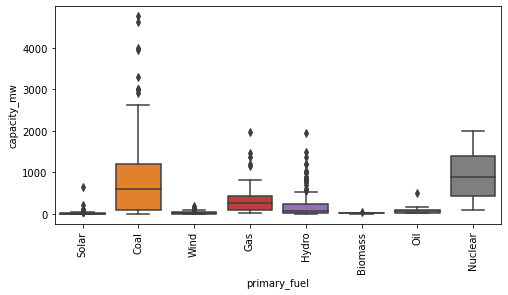

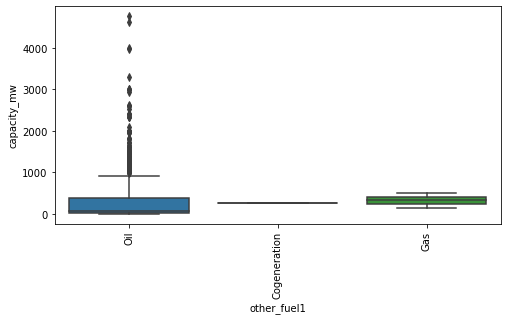

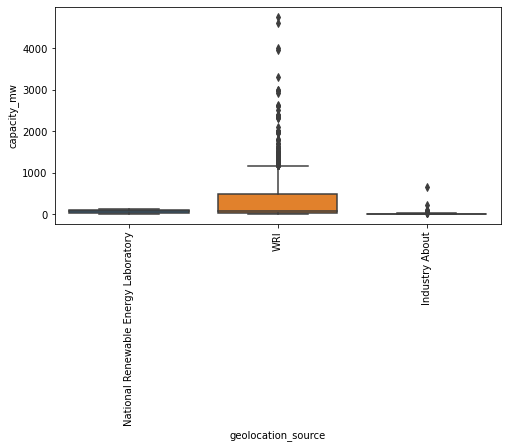

In [42]:
# For all categorical columns compare the values ranges of capacity_mw
for i in categorical_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[i],y=df['capacity_mw'])
    plt.xticks(rotation=90)
    plt.show()

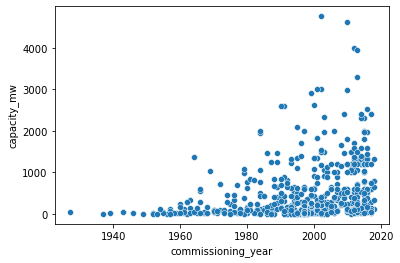

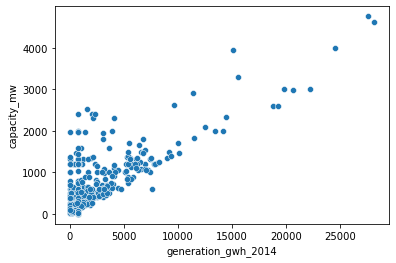

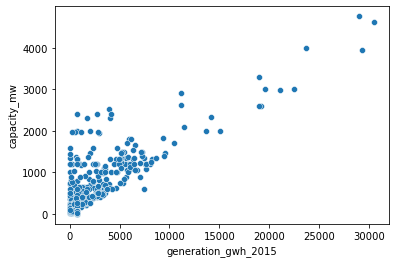

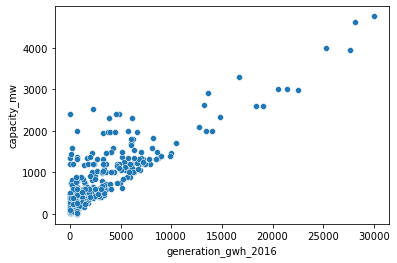

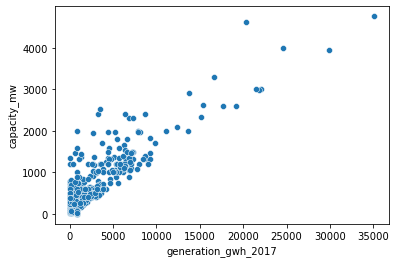

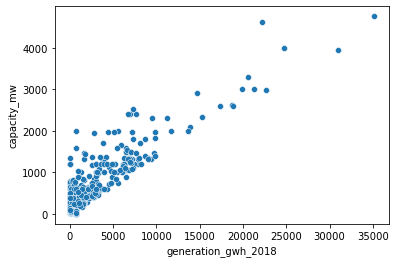

In [43]:
# for all numerical columns check how the capacity_mw vary
for i in numerical_col[1:]:
    sns.scatterplot(y=df['capacity_mw'],x=df[i])
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

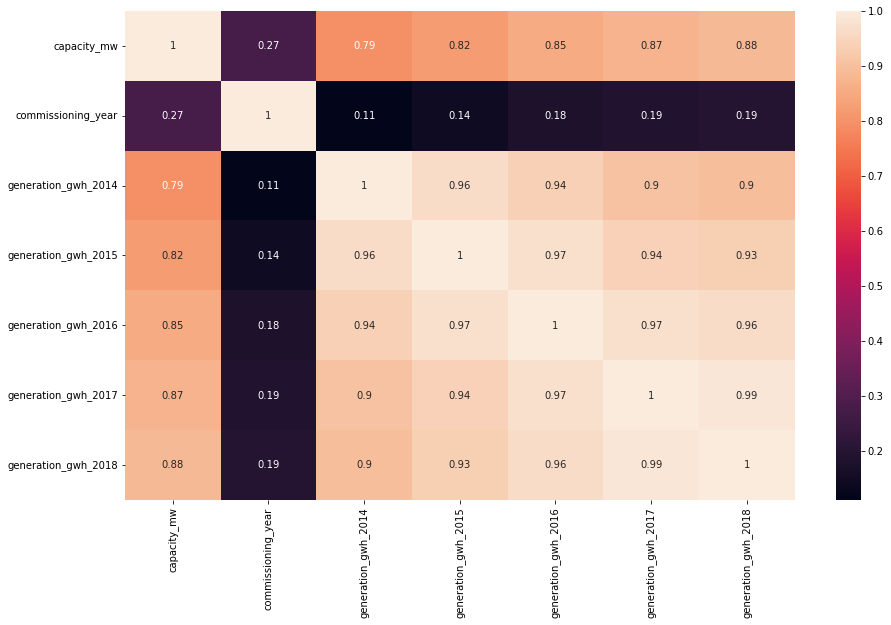

In [44]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

There are features which have high correlation with each other. We'll drop them later after checking the VIF score. 

In [45]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [46]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['primary_fuel', 'other_fuel1', 'geolocation_source']

In [47]:
#one hot encoding of the other_fuel1 column
dfother_fuel1=pd.get_dummies(df['other_fuel1'],prefix="other_fuel1")
dfother_fuel1

,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
902,0,0,1
903,0,0,1
904,0,0,1
905,0,0,1


In [48]:
#one hot encoding of the geolocation_source column
dfgeolocation_source=pd.get_dummies(df['geolocation_source'],prefix="geolocation_source")
dfgeolocation_source

,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
902,0,0,1
903,1,0,0
904,0,0,1
905,0,0,1


In [49]:
# Concatenate the original dataframe with dataframes created for other_fuel1, geolocation_source
df=pd.concat([df,dfother_fuel1],axis=1)
df=pd.concat([df,dfgeolocation_source],axis=1)

In [50]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'other_fuel1_Cogeneration', 'other_fuel1_Gas', 'other_fuel1_Oil',
       'geolocation_source_Industry About',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI'],
      dtype='object')

#### Check for correlation in the columns that were One-Hot-Encoded

In [51]:
ohe_cols=dfother_fuel1.columns.tolist()+dfgeolocation_source.columns.tolist()
ohe_cols

['other_fuel1_Cogeneration',
 'other_fuel1_Gas',
 'other_fuel1_Oil',
 'geolocation_source_Industry About',
 'geolocation_source_National Renewable Energy Laboratory',
 'geolocation_source_WRI']

<AxesSubplot:>

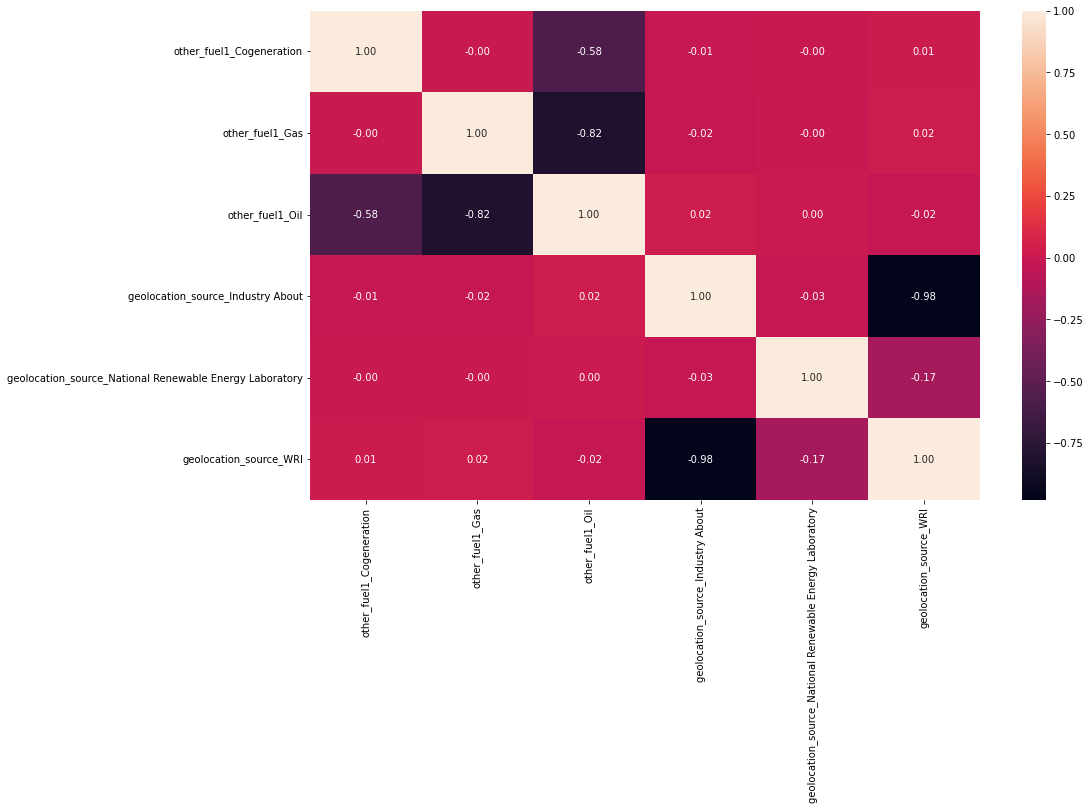

In [52]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")

In [53]:
# Create X with all independent variables
X=df[['capacity_mw', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','other_fuel1_Cogeneration', 'other_fuel1_Gas', 'other_fuel1_Oil', 'geolocation_source_Industry About', 'geolocation_source_National Renewable Energy Laboratory', 'geolocation_source_WRI']]
X

,capacity_mw,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,2011.000000,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,1,0
1,98.0,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1
2,39.2,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1
3,135.0,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1,0,0,1
4,1800.0,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,2016.000000,801.123775,0.994875,233.596650,865.400000,686.500000,0,0,1,0,0,1
903,3.0,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,1,0,0
904,25.5,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1
905,80.0,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1


In [54]:
# Create y with only target variable(primary_fuel)
y=df['primary_fuel']
y

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 907, dtype: object

In [55]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
7,inf,other_fuel1_Cogeneration
8,inf,other_fuel1_Gas
9,inf,other_fuel1_Oil
10,inf,geolocation_source_Industry About
11,inf,geolocation_source_National Renewable Energy L...
12,inf,geolocation_source_WRI
5,52.316864,generation_gwh_2017
4,44.053029,generation_gwh_2016
6,43.939440,generation_gwh_2018
3,34.329698,generation_gwh_2015


In [56]:
# Drop other_fuel1_Cogeneration as the VIF score is infinite
X.drop(columns=['other_fuel1_Cogeneration'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
11,24255.469632,geolocation_source_WRI
9,3693.457187,geolocation_source_Industry About
10,126.931486,geolocation_source_National Renewable Energy L...
5,52.316864,generation_gwh_2017
4,44.053029,generation_gwh_2016
6,43.939440,generation_gwh_2018
3,34.329698,generation_gwh_2015
2,14.371804,generation_gwh_2014
0,5.238549,capacity_mw
7,3.006862,other_fuel1_Gas


In [57]:
# Drop geolocation_source_WRI as the VIF score is infinite
X.drop(columns=['geolocation_source_WRI'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,877.637967,commissioning_year
8,873.551811,other_fuel1_Oil
5,67.792521,generation_gwh_2017
6,56.015488,generation_gwh_2018
4,55.909693,generation_gwh_2016
3,43.123105,generation_gwh_2015
2,18.376032,generation_gwh_2014
0,6.447131,capacity_mw
7,2.892479,other_fuel1_Gas
9,1.229510,geolocation_source_Industry About


In [58]:
# Drop commissioning_year as the VIF score is infinite
X.drop(columns=['commissioning_year'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
4,67.751064,generation_gwh_2017
5,55.953284,generation_gwh_2018
3,55.908044,generation_gwh_2016
2,43.116511,generation_gwh_2015
1,18.372761,generation_gwh_2014
0,6.427454,capacity_mw
7,1.642676,other_fuel1_Oil
8,1.229132,geolocation_source_Industry About
9,1.006718,geolocation_source_National Renewable Energy L...
6,1.006055,other_fuel1_Gas


In [59]:
# Drop generation_gwh_2017 as the VIF score is infinite
X.drop(columns=['generation_gwh_2017'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
3,45.751384,generation_gwh_2016
2,42.477320,generation_gwh_2015
4,23.564108,generation_gwh_2018
1,18.317132,generation_gwh_2014
0,6.390649,capacity_mw
6,1.620562,other_fuel1_Oil
7,1.229081,geolocation_source_Industry About
8,1.006713,geolocation_source_National Renewable Energy L...
5,1.003685,other_fuel1_Gas


In [60]:
# Drop generation_gwh_2016 as the VIF score is infinite
X.drop(columns=['generation_gwh_2016'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
2,27.311152,generation_gwh_2015
1,18.305499,generation_gwh_2014
3,15.190853,generation_gwh_2018
0,6.382337,capacity_mw
5,1.620001,other_fuel1_Oil
6,1.228900,geolocation_source_Industry About
7,1.006709,geolocation_source_National Renewable Energy L...
4,1.003681,other_fuel1_Gas


In [61]:
# Drop generation_gwh_2015 as the VIF score is infinite
X.drop(columns=['generation_gwh_2015'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
2,11.105746,generation_gwh_2018
1,6.524440,generation_gwh_2014
0,6.350683,capacity_mw
4,1.603077,other_fuel1_Oil
5,1.228634,geolocation_source_Industry About
6,1.006705,geolocation_source_National Renewable Energy L...
3,1.003456,other_fuel1_Gas


In [62]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0,16.725000,59.200000,385.250000,4760.0
generation_gwh_2014,907.0,1516.689956,2785.604307,0.0,801.123775,801.123775,801.123775,28127.0
generation_gwh_2018,907.0,1665.011030,3168.826750,0.0,751.644375,751.644375,751.644375,35136.0
other_fuel1_Gas,907.0,0.002205,0.046932,0.0,0.000000,0.000000,0.000000,1.0
other_fuel1_Oil,907.0,0.996692,0.057448,0.0,1.000000,1.000000,1.000000,1.0
geolocation_source_Industry About,907.0,0.131202,0.337807,0.0,0.000000,0.000000,0.000000,1.0
geolocation_source_National Renewable Energy Laboratory,907.0,0.004410,0.066299,0.0,0.000000,0.000000,0.000000,1.0


In [63]:
#Feature scaling of X
ss=StandardScaler()

In [64]:
# Apply standard scaler on only relevant columns
X[['capacity_mw','generation_gwh_2014','generation_gwh_2018']]=ss.fit_transform(X[['capacity_mw','generation_gwh_2014','generation_gwh_2018']])
X

,capacity_mw,generation_gwh_2014,generation_gwh_2018,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory
0,-0.548908,-0.257022,-0.288394,0,1,0,1
1,-0.386977,-0.257022,-0.288394,0,1,0,0
2,-0.486679,-0.257022,-0.288394,0,1,0,0
3,-0.324240,-0.322873,-0.327990,0,1,0,0
4,2.498942,0.545554,1.772608,0,1,0,0
...,...,...,...,...,...,...,...
902,2.159821,-0.257022,-0.308963,0,1,0,0
903,-0.548060,-0.257022,-0.288394,0,1,1,0
904,-0.509909,-0.257022,-0.288394,0,1,0,0
905,-0.417498,-0.257022,-0.288394,0,1,0,0


In [65]:
y.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [66]:
# Oversampling the data as Attrition values are not balanced
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [67]:
y.value_counts()

Solar      258
Coal       258
Wind       258
Gas        258
Hydro      258
Biomass    258
Oil        258
Nuclear    258
Name: primary_fuel, dtype: int64

### Model Building

In [68]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [69]:
X_train

,capacity_mw,generation_gwh_2014,generation_gwh_2018,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory
1040,-0.523166,-0.257022,-0.288394,0,1,0,0
506,-0.499735,-0.257022,-0.288394,0,1,0,0
1074,-0.536191,-0.257022,-0.288394,0,1,0,0
933,-0.503900,-0.257022,-0.288394,0,1,0,0
105,-0.451410,-0.541860,-0.525641,0,1,0,0
...,...,...,...,...,...,...,...
407,-0.551451,-0.257022,-0.288394,0,1,1,0
2051,-0.525169,-0.257022,-0.288394,0,1,0,0
522,-0.476844,-0.422082,-0.407015,0,1,0,0
1212,-0.474784,-0.257022,-0.288394,0,1,0,0


In [70]:
X_test

,capacity_mw,generation_gwh_2014,generation_gwh_2018,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory
418,0.803337,-0.257022,-0.447069,0,1,0,0
1233,-0.430897,-0.392149,-0.371015,0,1,0,0
1203,-0.439961,-0.426053,-0.464733,0,1,0,0
604,-0.441915,-0.257022,-0.288394,0,1,0,0
1332,0.192920,0.463929,-0.180783,0,1,0,0
...,...,...,...,...,...,...,...
767,3.719778,0.024386,1.771480,0,1,0,0
983,-0.536191,-0.257022,-0.288394,0,1,0,0
1387,1.011882,0.128711,-0.154055,0,1,0,0
1121,2.189118,-0.158595,1.089392,0,1,0,0


In [71]:
y_train

1040    Biomass
506        Wind
1074    Biomass
933     Biomass
105         Oil
         ...   
407       Solar
2051       Wind
522       Hydro
1212        Gas
1199        Gas
Name: primary_fuel, Length: 1548, dtype: object

In [72]:
y_test

418        Coal
1233        Gas
1203        Gas
604        Wind
1332    Nuclear
         ...   
767        Coal
983     Biomass
1387    Nuclear
1121        Gas
1808      Solar
Name: primary_fuel, Length: 516, dtype: object

#### Logistic Regression

In [73]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [74]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array(['Biomass', 'Biomass', 'Biomass', ..., 'Oil', 'Biomass', 'Gas'],
      dtype=object)

In [75]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.4909560723514212

In [76]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array(['Gas', 'Oil', 'Oil', 'Wind', 'Nuclear', 'Biomass', 'Nuclear',
       'Oil', 'Oil', 'Nuclear', 'Biomass', 'Oil', 'Coal', 'Solar',
       'Nuclear', 'Biomass', 'Biomass', 'Gas', 'Solar', 'Coal', 'Biomass',
       'Nuclear', 'Biomass', 'Nuclear', 'Solar', 'Gas', 'Solar', 'Oil',
       'Biomass', 'Oil', 'Solar', 'Solar', 'Coal', 'Biomass', 'Biomass',
       'Biomass', 'Biomass', 'Biomass', 'Biomass', 'Biomass', 'Biomass',
       'Nuclear', 'Oil', 'Wind', 'Coal', 'Coal', 'Biomass', 'Biomass',
       'Wind', 'Wind', 'Coal', 'Solar', 'Oil', 'Nuclear', 'Biomass',
       'Hydro', 'Biomass', 'Biomass', 'Biomass', 'Nuclear', 'Solar',
       'Hydro', 'Nuclear', 'Solar', 'Nuclear', 'Oil', 'Gas', 'Biomass',
       'Biomass', 'Coal', 'Nuclear', 'Biomass', 'Nuclear', 'Nuclear',
       'Oil', 'Solar', 'Solar', 'Biomass', 'Gas', 'Nuclear', 'Biomass',
       'Oil', 'Biomass', 'Biomass', 'Oil', 'Nuclear', 'Coal', 'Biomass',
       'Gas', 'Coal', 'Coal', 'Gas', 'Biomass', 'Solar', 'Coal', 'Solar',
 

In [77]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0],
       [10, 19,  6,  5, 17,  5,  0,  3],
       [ 6,  5, 25, 11,  2, 11,  0,  3],
       [16,  2, 11,  7,  6, 24,  0,  0],
       [ 0, 37,  5,  2, 31,  0,  0,  0],
       [25,  0,  0,  0,  0, 29,  0,  8],
       [ 2,  0,  0,  0,  0,  0, 62,  0],
       [60,  0,  0,  3,  0,  0,  0,  3]], dtype=int64)

In [78]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.4476744186046512

The accuracy score of the Logistic regression model is quite low. Lets try a non-linear model like Random Forest.

#### Random Forest

In [79]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['Biomass', 'Wind', 'Biomass', ..., 'Hydro', 'Gas', 'Gas'],
      dtype=object)

In [81]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.9580103359173127

In [82]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['Nuclear', 'Gas', 'Hydro', 'Gas', 'Nuclear', 'Hydro', 'Nuclear',
       'Hydro', 'Oil', 'Coal', 'Wind', 'Hydro', 'Nuclear', 'Solar',
       'Nuclear', 'Biomass', 'Biomass', 'Gas', 'Solar', 'Nuclear', 'Oil',
       'Coal', 'Oil', 'Nuclear', 'Solar', 'Coal', 'Solar', 'Oil',
       'Biomass', 'Oil', 'Solar', 'Solar', 'Nuclear', 'Wind', 'Hydro',
       'Biomass', 'Wind', 'Biomass', 'Wind', 'Biomass', 'Biomass',
       'Nuclear', 'Oil', 'Oil', 'Coal', 'Nuclear', 'Wind', 'Wind', 'Wind',
       'Gas', 'Coal', 'Solar', 'Oil', 'Nuclear', 'Oil', 'Gas', 'Biomass',
       'Oil', 'Biomass', 'Coal', 'Solar', 'Wind', 'Nuclear', 'Solar',
       'Nuclear', 'Oil', 'Gas', 'Wind', 'Biomass', 'Nuclear', 'Nuclear',
       'Biomass', 'Nuclear', 'Nuclear', 'Oil', 'Solar', 'Solar', 'Hydro',
       'Gas', 'Nuclear', 'Biomass', 'Oil', 'Biomass', 'Biomass', 'Gas',
       'Nuclear', 'Coal', 'Wind', 'Gas', 'Nuclear', 'Nuclear', 'Coal',
       'Biomass', 'Solar', 'Nuclear', 'Solar', 'Gas', 'Oil', 'Wind',
    

In [83]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[43,  2,  0,  1,  0,  2,  1,  6],
       [ 5, 26,  9,  3, 15,  4,  0,  3],
       [ 4,  3, 44,  6,  0,  4,  0,  2],
       [ 7,  4,  9, 39,  4,  0,  0,  3],
       [ 0,  5,  3,  0, 67,  0,  0,  0],
       [ 3,  0,  2,  0,  0, 46,  1, 10],
       [ 0,  1,  0,  0,  0,  0, 62,  1],
       [13,  3,  3,  5,  0,  4,  0, 38]], dtype=int64)

In [84]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7073643410852714

The accuracy on the test data looks better now. However the accuracy on the train data is very high as compared to on the test data. We'll try to fix the overfitting using hyperparameter tuning.

#### Hyperparameter Tuning

In [85]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [12, 14, 16],
    #'max_depth': [8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["log2"],
    #'n_estimators': [100, 200, 300, 400, 500, 600]
    'n_estimators': [500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [86]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500
[CV 1/5; 1/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=0.729 total time=   0.7s
[CV 2/5; 1/27] START bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500
[CV 2/5; 1/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=0.710 total time=   0.8s
[CV 3/5; 1/27] START bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500
[CV 3/5; 1/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=0.710 total time=   0.9s
[CV 4/5; 1/27] START bootstrap=True, max_depth=12, max_features=log2, min_sam

[CV 4/5; 6/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.706 total time=   0.7s
[CV 5/5; 6/27] START bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 5/5; 6/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.715 total time=   0.8s
[CV 1/5; 7/27] START bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=500
[CV 1/5; 7/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=500;, score=0.703 total time=   0.8s
[CV 2/5; 7/27] START bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=500
[CV 2/5; 7/27] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=500;, score=0.703

[CV 3/5; 12/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.710 total time=   0.6s
[CV 4/5; 12/27] START bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 4/5; 12/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.696 total time=   0.8s
[CV 5/5; 12/27] START bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 5/5; 12/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.718 total time=   0.7s
[CV 1/5; 13/27] START bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=500
[CV 1/5; 13/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, scor

[CV 2/5; 18/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.700 total time=   0.5s
[CV 3/5; 18/27] START bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500
[CV 3/5; 18/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.697 total time=   0.6s
[CV 4/5; 18/27] START bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500
[CV 4/5; 18/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, score=0.693 total time=   0.7s
[CV 5/5; 18/27] START bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500
[CV 5/5; 18/27] END bootstrap=True, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=500;, scor

[CV 1/5; 24/27] END bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.726 total time=   0.5s
[CV 2/5; 24/27] START bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 2/5; 24/27] END bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.706 total time=   0.6s
[CV 3/5; 24/27] START bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 3/5; 24/27] END bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.706 total time=   0.5s
[CV 4/5; 24/27] START bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 4/5; 24/27] END bootstrap=True, max_depth=16, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, scor

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [12, 14, 16],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [500]},
             verbose=10)

In [87]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}


In [88]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_split=4,
                       n_estimators=500)

In [89]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['Biomass', 'Biomass', 'Biomass', ..., 'Hydro', 'Oil', 'Gas'],
      dtype=object)

In [90]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.8591731266149871

In [91]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['Nuclear', 'Gas', 'Hydro', 'Oil', 'Nuclear', 'Hydro', 'Nuclear',
       'Hydro', 'Oil', 'Nuclear', 'Wind', 'Hydro', 'Nuclear', 'Solar',
       'Nuclear', 'Biomass', 'Biomass', 'Gas', 'Solar', 'Nuclear', 'Oil',
       'Coal', 'Biomass', 'Nuclear', 'Solar', 'Coal', 'Solar', 'Oil',
       'Biomass', 'Oil', 'Solar', 'Solar', 'Nuclear', 'Wind', 'Biomass',
       'Biomass', 'Wind', 'Wind', 'Wind', 'Biomass', 'Biomass', 'Nuclear',
       'Oil', 'Oil', 'Coal', 'Nuclear', 'Wind', 'Wind', 'Oil', 'Oil',
       'Coal', 'Solar', 'Oil', 'Nuclear', 'Oil', 'Gas', 'Biomass',
       'Biomass', 'Biomass', 'Coal', 'Solar', 'Wind', 'Nuclear', 'Solar',
       'Nuclear', 'Oil', 'Gas', 'Wind', 'Biomass', 'Nuclear', 'Nuclear',
       'Biomass', 'Coal', 'Nuclear', 'Oil', 'Solar', 'Solar', 'Hydro',
       'Gas', 'Nuclear', 'Biomass', 'Oil', 'Biomass', 'Biomass', 'Gas',
       'Nuclear', 'Coal', 'Wind', 'Gas', 'Nuclear', 'Nuclear', 'Coal',
       'Biomass', 'Solar', 'Nuclear', 'Solar', 'Wind', 'Oil', 'Oil'

In [92]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[49,  1,  0,  0,  0,  2,  0,  3],
       [ 6, 27,  5,  1, 15,  5,  0,  6],
       [ 6,  2, 41,  7,  0,  5,  0,  2],
       [ 8,  4,  8, 38,  5,  0,  0,  3],
       [ 0,  3,  4,  0, 68,  0,  0,  0],
       [ 7,  0,  0,  0,  0, 47,  0,  8],
       [ 0,  1,  0,  0,  0,  0, 62,  1],
       [16,  1,  0,  6,  0,  7,  0, 36]], dtype=int64)

In [93]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7131782945736435

After hyperparameter tuning the test accuracy is slightly better.

In [94]:
# Saving the best model
pickle.dump(rf, open('model_global_power_plant_classification.pkl', 'wb'))

### Feature Engineering (Target Variable-capacity_mw)

In [95]:
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,Solar,Oil,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,1,0
1,98.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1
2,39.2,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1
3,135.0,Gas,Oil,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1,0,0,1
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,0,0,1,0,0,1
903,3.0,Solar,Oil,1997.091082,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,1,0,0
904,25.5,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1
905,80.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1


In [96]:
#converting categorical feature region to numerical values
#one hot encoding of the primary_fuel column
dfprimary_fuel=pd.get_dummies(df['primary_fuel'],prefix="primary_fuel")
dfprimary_fuel

,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
902,0,1,0,0,0,0,0,0
903,0,0,0,0,0,0,1,0
904,0,0,0,0,0,0,0,1
905,0,1,0,0,0,0,0,0


In [97]:
# Concatenate the original dataframe with dataframe created for primary_fuel values
df=pd.concat([df,dfprimary_fuel],axis=1)
df

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,Solar,Oil,2011.000000,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,...,1,0,0,0,0,0,0,0,1,0
1,98.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,...,0,1,0,1,0,0,0,0,0,0
2,39.2,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,...,0,1,0,0,0,0,0,0,0,1
3,135.0,Gas,Oil,2004.000000,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,...,0,1,0,0,1,0,0,0,0,0
4,1800.0,Coal,Oil,2015.000000,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,2016.000000,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,...,0,1,0,1,0,0,0,0,0,0
903,3.0,Solar,Oil,1997.091082,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,...,0,0,0,0,0,0,0,0,1,0
904,25.5,Wind,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,...,0,1,0,0,0,0,0,0,0,1
905,80.0,Coal,Oil,1997.091082,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,...,0,1,0,1,0,0,0,0,0,0


In [98]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'other_fuel1_Cogeneration', 'other_fuel1_Gas', 'other_fuel1_Oil',
       'geolocation_source_Industry About',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI', 'primary_fuel_Biomass', 'primary_fuel_Coal',
       'primary_fuel_Gas', 'primary_fuel_Hydro', 'primary_fuel_Nuclear',
       'primary_fuel_Oil', 'primary_fuel_Solar', 'primary_fuel_Wind'],
      dtype='object')

In [99]:
# Create X with all independent variable
X=df[['commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'other_fuel1_Cogeneration', 'other_fuel1_Gas', 'other_fuel1_Oil',
       'geolocation_source_Industry About',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI', 'primary_fuel_Biomass', 'primary_fuel_Coal',
       'primary_fuel_Gas', 'primary_fuel_Hydro', 'primary_fuel_Nuclear',
       'primary_fuel_Oil', 'primary_fuel_Solar', 'primary_fuel_Wind']]
X

,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2011.000000,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2016.000000,801.123775,0.994875,233.596650,865.400000,686.500000,0,0,1,0,0,1,0,1,0,0,0,0,0,0
903,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,1,0,0,0,0,0,0,0,0,1,0
904,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1,0,0,0,0,0,0,0,1
905,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [100]:
y=df['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [101]:
#Feature scaling
ss=StandardScaler()

In [102]:
# Apply standard scaler on only relevant columns
X[['generation_gwh_2014','generation_gwh_2018']]=ss.fit_transform(X[['generation_gwh_2014','generation_gwh_2018']])
X

,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2011.000000,-0.257022,711.181225,737.205450,817.977250,-0.288394,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,1997.091082,-0.257022,711.181225,737.205450,817.977250,-0.288394,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,1997.091082,-0.257022,711.181225,737.205450,817.977250,-0.288394,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,2004.000000,-0.322873,843.747000,886.004428,663.774500,-0.327990,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,2015.000000,0.545554,5916.370000,6243.000000,5385.579736,1.772608,0,0,1,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2016.000000,-0.257022,0.994875,233.596650,865.400000,-0.308963,0,0,1,0,0,1,0,1,0,0,0,0,0,0
903,1997.091082,-0.257022,711.181225,737.205450,817.977250,-0.288394,0,0,1,1,0,0,0,0,0,0,0,0,1,0
904,1997.091082,-0.257022,711.181225,737.205450,817.977250,-0.288394,0,0,1,0,0,1,0,0,0,0,0,0,0,1
905,1997.091082,-0.257022,711.181225,737.205450,817.977250,-0.288394,0,0,1,0,0,1,0,1,0,0,0,0,0,0


In [103]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
10,inf,geolocation_source_National Renewable Energy L...
11,inf,geolocation_source_WRI
18,inf,primary_fuel_Solar
17,inf,primary_fuel_Oil
16,inf,primary_fuel_Nuclear
15,inf,primary_fuel_Hydro
14,inf,primary_fuel_Gas
13,inf,primary_fuel_Coal
12,inf,primary_fuel_Biomass
19,inf,primary_fuel_Wind


In [104]:
#Dropping column geolocation_source_National Renewable Energy Laboratory as its vif value is infinite
X.drop(columns=['geolocation_source_National Renewable Energy Laboratory'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
18,inf,primary_fuel_Wind
16,inf,primary_fuel_Oil
6,inf,other_fuel1_Cogeneration
7,inf,other_fuel1_Gas
8,inf,other_fuel1_Oil
17,inf,primary_fuel_Solar
11,inf,primary_fuel_Biomass
12,inf,primary_fuel_Coal
13,inf,primary_fuel_Gas
14,inf,primary_fuel_Hydro


In [105]:
#Dropping column primary_fuel_Wind as its vif value is infinite
X.drop(columns=['primary_fuel_Wind'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
8,31494.887404,other_fuel1_Oil
7,69.466436,other_fuel1_Gas
10,53.161300,geolocation_source_WRI
4,52.336368,generation_gwh_2017
3,44.008408,generation_gwh_2016
5,38.972710,generation_gwh_2018
6,35.766574,other_fuel1_Cogeneration
2,34.220097,generation_gwh_2015
17,28.461405,primary_fuel_Solar
9,26.934059,geolocation_source_Industry About


In [106]:
#Dropping column other_fuel1_Oil as its vif value is very high
X.drop(columns=['other_fuel1_Oil'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,470.450754,commissioning_year
9,386.858121,geolocation_source_WRI
4,67.731175,generation_gwh_2017
3,55.728676,generation_gwh_2016
2,42.956072,generation_gwh_2015
5,38.784664,generation_gwh_2018
16,33.091615,primary_fuel_Solar
8,30.080392,geolocation_source_Industry About
1,14.227653,generation_gwh_2014
11,3.467841,primary_fuel_Coal


In [107]:
#Dropping column commissioning_year as its vif value is very high
X.drop(columns=['commissioning_year'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
3,66.624824,generation_gwh_2017
2,55.723675,generation_gwh_2016
1,42.794481,generation_gwh_2015
4,37.860687,generation_gwh_2018
8,19.110599,geolocation_source_WRI
15,16.683297,primary_fuel_Solar
7,16.600179,geolocation_source_Industry About
0,14.071036,generation_gwh_2014
10,3.415659,primary_fuel_Coal
12,3.013449,primary_fuel_Hydro


In [108]:
#Dropping column generation_gwh_2017 as its vif value is very high
X.drop(columns=['generation_gwh_2017'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
2,45.545485,generation_gwh_2016
1,42.297672,generation_gwh_2015
14,16.399674,primary_fuel_Solar
6,16.350899,geolocation_source_Industry About
3,14.827679,generation_gwh_2018
0,14.051200,generation_gwh_2014
7,12.541337,geolocation_source_WRI
9,3.415658,primary_fuel_Coal
11,3.009046,primary_fuel_Hydro
10,1.555337,primary_fuel_Gas


In [109]:
#Dropping column generation_gwh_2016 as its vif value is very high
X.drop(columns=['generation_gwh_2016'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
1,26.959955,generation_gwh_2015
13,16.333037,primary_fuel_Solar
5,16.292331,geolocation_source_Industry About
0,14.038268,generation_gwh_2014
6,10.997900,geolocation_source_WRI
2,8.042633,generation_gwh_2018
8,3.415039,primary_fuel_Coal
10,3.008911,primary_fuel_Hydro
9,1.555316,primary_fuel_Gas
7,1.400080,primary_fuel_Biomass


In [110]:
#Dropping column generation_gwh_2015 as its vif value is very high
X.drop(columns=['generation_gwh_2015'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
12,16.132776,primary_fuel_Solar
4,16.116319,geolocation_source_Industry About
5,6.359456,geolocation_source_WRI
1,5.279029,generation_gwh_2018
0,5.054078,generation_gwh_2014
7,3.414269,primary_fuel_Coal
9,3.008027,primary_fuel_Hydro
8,1.552506,primary_fuel_Gas
6,1.400001,primary_fuel_Biomass
11,1.271600,primary_fuel_Oil


In [111]:
#Dropping column primary_fuel_Solar as its vif value is very high
X.drop(columns=['primary_fuel_Solar'],inplace=True)
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
5,6.263530,geolocation_source_WRI
1,5.278733,generation_gwh_2018
0,5.054078,generation_gwh_2014
7,3.384938,primary_fuel_Coal
9,2.976387,primary_fuel_Hydro
8,1.543833,primary_fuel_Gas
6,1.393701,primary_fuel_Biomass
11,1.269049,primary_fuel_Oil
3,1.111235,other_fuel1_Gas
10,1.086286,primary_fuel_Nuclear


### Model Building

In [112]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [113]:
X_train

,generation_gwh_2014,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,geolocation_source_Industry About,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil
560,-0.141306,-0.333440,0,0,0,1,0,0,0,1,0,0
651,-0.257022,-0.288394,0,0,0,1,0,0,0,1,0,0
297,1.948803,1.795758,0,0,0,1,0,1,0,0,0,0
557,-0.257022,-0.288394,0,0,0,1,0,0,0,0,0,0
570,-0.498578,-0.500657,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
818,-0.257022,-0.472806,0,0,0,1,0,0,0,1,0,0
522,-0.422082,-0.407015,0,0,0,1,0,0,0,1,0,0
211,-0.257022,-0.288394,0,0,0,1,0,0,0,0,0,0
188,-0.130398,-0.255381,0,0,0,1,0,1,0,0,0,0


In [114]:
X_test

,generation_gwh_2014,generation_gwh_2018,other_fuel1_Cogeneration,other_fuel1_Gas,geolocation_source_Industry About,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil
293,-0.338802,-0.273637,0,0,0,1,0,0,1,0,0,0
400,-0.257022,-0.288394,0,0,1,0,0,0,0,0,0,0
177,-0.257022,-0.380503,0,0,0,1,0,0,0,1,0,0
574,0.388614,0.217581,0,0,0,1,0,1,0,0,0,0
693,0.577949,0.499091,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
449,1.663433,1.506144,0,0,0,1,0,1,0,0,0,0
751,-0.257022,-0.288394,0,0,1,0,0,0,0,0,0,0
120,-0.257022,-0.288394,0,0,1,0,0,0,0,0,0,0
320,-0.257022,-0.288394,0,0,0,1,0,0,0,1,0,0


In [115]:
y_train

560     520.00
651       6.00
297    1200.00
557     150.00
570      80.00
        ...   
818      60.00
522      45.00
211       4.25
188     210.00
175     595.20
Name: capacity_mw, Length: 680, dtype: float64

In [116]:
y_test

293     445.674
400      10.000
177      96.000
574     500.000
693     500.000
         ...   
449    1320.000
751       5.000
120      36.300
320       4.000
585     220.000
Name: capacity_mw, Length: 227, dtype: float64

#### Linear Regression

In [117]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [118]:
# Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([ 160.41278472,  176.35452028, 1334.77348988,   34.32552083,
         74.31593794,  338.56164767,   20.85222222,  664.34433196,
        235.94655212,  149.85421723,  176.35452028,   34.32552083,
       1405.02157469,   34.32552083,  338.56164767,   18.80722222,
        114.33979146,   20.85222222,  483.15387434,   93.86884084,
         34.32552083,  415.60825227,  224.28834165,  922.04622071,
        176.35452028,  338.56164767,  247.19033248,   34.32552083,
        226.25685493,  176.35452028,  176.35452028,   87.30902154,
         75.90257556,   34.32552083,   99.33291929,  176.35452028,
         -6.56578908,   20.85222222, 2950.89453119,   34.32552083,
       2308.64526004,   95.02072079,  176.35452028,   18.80722222,
         20.85222222, 1239.8237573 ,  340.90750364,   20.85222222,
        338.56164767,  149.94792179,  338.56164767,   34.32552083,
         70.33844184,  338.56164767,  639.7057877 , 1112.18966341,
       1699.48444144,   20.85222222,   20.85222222,   20.85222

In [119]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

64568.218622883345

In [120]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.8173930981041474

In [121]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([ 344.62901253,   20.85222222,  135.66235438,  584.18204096,
        715.02636317, 1068.25313239,   34.32552083,  318.63741699,
        627.22062058,   92.66486142,  279.49378648, 2536.66161858,
         72.5538727 ,   20.85222222,   34.32552083,  262.39203601,
         34.32552083,   34.32552083,  229.24891298,  226.21397325,
        436.82410032,  187.03423477,  118.31329442,   34.32552083,
         66.38835248,   18.80722222,   92.88979942,   20.85222222,
        122.29402198,   18.80722222,  960.70877269, 1170.94021257,
        374.27820932,  321.45732706,   34.32552083,  885.54812654,
        338.56164767,  176.35452028,  338.56164767,  105.82554272,
        165.68453976,  176.35452028,  338.56164767,  105.32615029,
        338.56164767, 3276.46315577,   18.80722222,   34.32552083,
        226.36406633,  169.83510665,  236.05867063,   18.80722222,
        329.80044151, 2287.41080815,   34.32552083,  338.56164767,
        338.56164767,  490.53555859,  218.96386563,   20.85222

In [122]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

47820.68178346072

In [123]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8552538140509545

<AxesSubplot:xlabel='capacity_mw'>

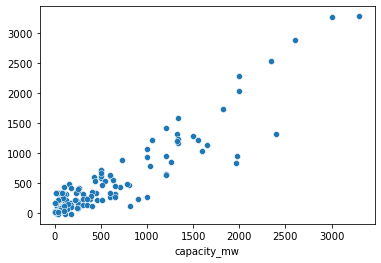

In [124]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

#### Random Forest

In [125]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [126]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([ 500.20172   ,   11.39686261, 1257.4       ,   34.40216667,
         68.33071   ,   70.28237164,   21.44604262, 1030.78      ,
        429.74666667,  115.704     ,   11.39686261,   34.40216667,
       1061.465     ,   34.40216667,   70.28237164,   18.85014806,
        119.0188    ,   21.44604262, 1601.05      ,   69.835     ,
         34.40216667,  537.05      ,  294.1978    , 1078.49      ,
         11.39686261,   70.28237164,  250.264     ,   34.40216667,
        275.56135965,   11.39686261,   11.39686261,  170.595     ,
         62.475     ,   34.40216667,  229.4363    ,   11.39686261,
         93.345     ,   21.44604262, 2607.6       ,   34.40216667,
       2202.2       ,   62.155     ,   11.39686261,   18.85014806,
         21.44604262, 1393.7       ,   55.17608425,   21.44604262,
         70.28237164,  109.1555    ,   70.28237164,   34.40216667,
         53.19      ,   70.28237164,  587.43      , 1126.4       ,
       1627.4       ,   21.44604262,   21.44604262,   21.44604

In [127]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

10525.485320509055

In [128]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9702326267268699

In [129]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([ 206.76864243,   21.44604262,  215.4373    ,  491.15      ,
        739.15      , 1054.        ,   34.40216667,  464.92178   ,
        789.09      ,  103.635     ,  124.13445   , 2722.2       ,
         30.7       ,   21.44604262,   34.40216667,  424.074     ,
         34.40216667,   34.40216667,  394.47386   ,  514.42698983,
        466.65586   ,  265.53072935,  132.5       ,   34.40216667,
        253.8878375 ,   18.85014806,  119.344     ,   21.44604262,
        113.39      ,   18.85014806, 1133.5       , 1160.6       ,
        380.25      ,  240.10902   ,   34.40216667, 1036.181     ,
         70.28237164,   11.39686261,   70.28237164,   85.7276    ,
        591.72175608,   11.39686261,   70.28237164,   46.52076967,
         70.28237164, 2915.6       ,   18.85014806,   34.40216667,
        430.2553625 ,  831.06005897,  559.4002381 ,   18.85014806,
       1262.52186   , 2234.4       ,   34.40216667,   70.28237164,
         70.28237164,  324.87849609,  313.8321    ,   21.44604

In [130]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

46803.746535520426

In [131]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8583319278085759

<AxesSubplot:xlabel='capacity_mw'>

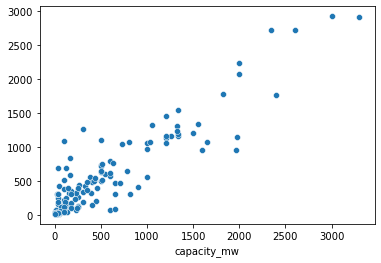

In [132]:
sns.scatterplot(x=y_test,y=y_test_pred)

Random Forest model gives slightly better result. We'll try hyperparameter tuning to improve the reult.

#### Hyperparameter tuning

In [133]:
param_grid = {
    'bootstrap': [True],
    #'max_depth': [8, 10, 12],
    'max_depth': [10],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    #'max_features': ["auto", "sqrt", "log2"],
    'max_features': ["sqrt"],
    #'n_estimators': [230, 250, 270]
    'n_estimators': [270]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [134]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=270
[CV 1/5; 1/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=270;, score=nan total time=   0.0s
[CV 2/5; 1/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=270
[CV 2/5; 1/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=270;, score=nan total time=   0.0s
[CV 3/5; 1/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=270
[CV 3/5; 1/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=270;, score=nan total time=   0.0s
[CV 4/5; 1/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 1/5; 7/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=0.870 total time=   0.1s
[CV 2/5; 7/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270
[CV 2/5; 7/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=0.739 total time=   0.1s
[CV 3/5; 7/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270
[CV 3/5; 7/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=0.909 total time=   0.1s
[CV 4/5; 7/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270
[CV 4/5; 7/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270;, score=0.856

[CV 5/5; 12/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=270
[CV 5/5; 12/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=270;, score=0.791 total time=   0.1s
[CV 1/5; 13/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=270
[CV 1/5; 13/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=270;, score=0.854 total time=   0.1s
[CV 2/5; 13/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=270
[CV 2/5; 13/15] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=270;, score=0.730 total time=   0.1s
[CV 3/5; 13/15] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=270
[CV 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [270]},
             verbose=10)

In [135]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 270}


In [136]:
#Fit the random forest classifier model
rf=RandomForestRegressor(**best_params)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=4,
                      n_estimators=270)

In [137]:
# Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([ 476.47429244,   24.57614036, 1317.50725925,   40.12242077,
         68.88926733,   80.93129419,   21.17656766, 1077.9652619 ,
        389.76712751,  111.86208915,   24.57614036,   40.12242077,
       1225.33814157,   40.12242077,   80.93129419,   22.11805676,
         99.16293177,   21.17656766, 1362.19257575,   88.26564604,
         40.12242077,  624.20032947,  268.15787405, 1103.76220276,
         24.57614036,   80.93129419,  294.01370125,   40.12242077,
        302.05025263,   24.57614036,   24.57614036,  100.55135587,
         68.58843335,   40.12242077,  172.25415097,   24.57614036,
        108.044743  ,   21.17656766, 2464.6047913 ,   40.12242077,
       2371.67010841,   90.40388516,   24.57614036,   22.11805676,
         21.17656766, 1480.3443174 ,   73.41287568,   21.17656766,
         80.93129419,  123.01269227,   80.93129419,   40.12242077,
         68.13245833,   80.93129419,  543.05964945, 1106.80000188,
       1770.45638161,   21.17656766,   21.17656766,   21.17656

In [138]:
# Display the mean squared error on train data
mean_squared_error(y_train,y_train_pred)

17818.194801381418

In [139]:
# Display the R2 score on train data
r2_score(y_train,y_train_pred)

0.9496079430491844

In [140]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([ 226.7014042 ,   21.17656766,  115.44371888,  524.65268472,
        656.38945864, 1084.76640982,   40.12242077,  394.98629809,
        762.84894854,   93.79846514,  160.47660968, 2809.81640212,
         65.12395347,   21.17656766,   40.12242077,  268.41331638,
         40.12242077,   40.12242077,  412.72787316,  533.97942851,
        442.97162763,  211.73817347,  103.44223511,   40.12242077,
        132.78656659,   22.11805676,   99.31730482,   21.17656766,
        109.06790076,   22.11805676, 1086.32895356, 1194.08901002,
        389.41233516,  234.97052397,   40.12242077, 1150.80213331,
         80.93129419,   24.57614036,   80.93129419,   94.82011049,
        158.56674445,   24.57614036,   80.93129419,   45.18025268,
         80.93129419, 3102.66963551,   22.11805676,   40.12242077,
        408.02241959,  104.32273867,  427.72103625,   22.11805676,
        249.99689277, 2451.23646644,   40.12242077,   80.93129419,
         80.93129419,  316.39290032,  313.0908565 ,   21.17656

In [141]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

37833.5740532882

In [142]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.885483323516139

<AxesSubplot:xlabel='capacity_mw'>

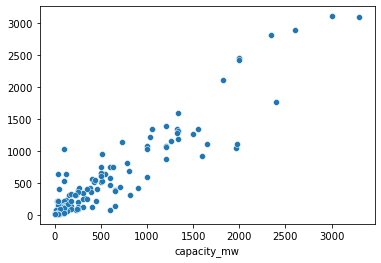

In [143]:
sns.scatterplot(x=y_test,y=y_test_pred)

After hyperparameter tuning there is a slight increase in the test R2 score.

In [144]:
# Saving the best model
pickle.dump(rf, open('model_global_power_plant_regression.pkl', 'wb'))